In [39]:
import numpy as np
import xarray as xr
import pandas as pd
import iris

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from plot_4p4 import extract_vortex_info, plot_t_bright_himawari
from func_4p4 import open_file

import matplotlib
%matplotlib inline
from matplotlib.patches import Rectangle
import cmocean

In [40]:
# plot characteristics 
lon_start = 93.0 # 88.0
lon_end = 123.0 # 130.0
lat_start = -3.0 # -6.0
lat_end = 20.0 # 23.0

bounds = [lon_start, lon_end, lat_start, lat_end]

Tp = 48
time = int(Tp-12)

In [4]:
# # read in new N768 MetUM data (12-h accumulated precip)
# prcp_data_path = '/nobackup/earshar/borneo/case_20181021T1200Z_N768_v2/umglaa_pa{0:03d}.nc'.format(time)
# wind_data_path = '/nobackup/earshar/borneo/case_20181021T1200Z_N768_v2/umglaa_pe{0:03d}.nc'.format(time)

In [42]:
# # read in 4p4 MetUM data 
# data_path_4p4 = '/nobackup/earshar/borneo/20181021T1200Z_SEA4_km4p4_ra1tld'
# _, date_str, _, _, _ = open_file(data_path_4p4, Tp, file_type='4p4')

### Read in 4p4 MetUM data (October 2023)

In [51]:
data_path_4p4 = '/nobackup/earshar/borneo/20181021T1200Z_SEA4_km4p4_ra1tld_pverb.nc'
data_pb = xr.open_dataset(data_path_4p4).metpy.parse_cf()
prcp_grid = data_pb['p'].sel(longitude=slice(bounds[0], bounds[1]), latitude=slice(bounds[2], bounds[3])).isel(t=0).squeeze('msl')

In [6]:
# # process 4p4 MetUM data and extract 12-h accumulated precipitation 
# data_path_4p4 = '{0}_pverb.pp'.format(data_path_4p4)
# pcubes = iris.load(data_path_4p4)
# prcp_4p4_data = xr.DataArray.from_iris(pcubes.extract('stratiform_rainfall_flux')[1])

In [7]:
# # subset and extract 12-h accumulated precipitation 
# prcp_4p4_data = prcp_4p4_data.sel(longitude=slice(bounds[0], bounds[1]), latitude=slice(bounds[2], bounds[3]))
# prcp_4p4_data = prcp_4p4_data * 3600. 
# prcp_4p4_data = prcp_4p4_data.resample(time="12H").sum().sel(time = slice('2018-10-21T12', '2018-10-26T12') )

### Vortex track + intensity data

- Convert time integers to datetime objects
- Extract track information between 12Z on 21 and 26 October

In [31]:
# vortex_path = '/nobackup/earshar/borneo/bv_2018102112_track.csv'
# bv_lat, bv_lon, bv_time = extract_vortex_info(vortex_path)

vortex_path = '/home/home02/earshar/borneo_vortex/bv_2018102112_track.txt'
vortex_df = pd.read_csv(vortex_path, sep=' & ', engine='python', na_filter=True, na_values="1.000000e+25")
vortex_df['Time'] = pd.to_datetime(vortex_df['Time'], format='%Y%m%d%H')
bv_lat = vortex_df.loc[0:20, "lat_vort"];
bv_lon = vortex_df.loc[0:20, "lon_vort"]
bv_time = vortex_df.loc[0:20, "Time"]

In [8]:
# # read in Himawari data 
# single_date_str = date_str.strftime("%Y%m%d_%H00")
# himawari_path = '/nobackup/earshar/borneo/himawari/himawari_10.4_{0}.nc'.format(single_date_str)

In [33]:
# read in GPM data 
# gpm_path = '/nobackup/earshar/borneo/GPMHH_201810.nc'
gpm_path = '/home/home02/earshar/borneo_vortex/GPMHH_201810.nc'
gpm_data = xr.open_dataset(gpm_path).sel(lon=slice(bounds[0], bounds[1]), lat=slice(bounds[2], bounds[3]))
prcp_gpm = gpm_data.precipitationCal

In [34]:
# divide by 2 (each 30-min interval contains precip rate in mm/hr)
prcp_gpm = prcp_gpm / 2

In [35]:
# resample GPM data to calculate 12-h accumulated precipitation
prcp_gpm_12h = prcp_gpm.resample(time="12H").sum().sel(time=slice('2018-10-21T12', '2018-10-26T12'))

In [4]:
# START FROM HERE 
# Convert to nc: DONE 
# Open and plot: DONE
# Customise plot: DONE
# Overlay vortex box position: DONE
# Make sure other files are still on ARC (4p4, GPM, Himawari): DONE
# Replot accumulated precipitation for N768 MetUM + Himawari (Figs. 3c,d + 4c,d): DONE
# Replot accumulated precipitation for 4p4 MetUM + GPM (Figs. 3a,b + 4a,b): DONE
# Replot time-series figure (Figure 5; also requires relative vorticity --> pe stream): TODO

In [12]:
# # open N768 MetUM data
# prcp_data = xr.open_dataset(prcp_data_path)
# wind_data = xr.open_dataset(wind_data_path)

In [36]:
# # process precipitation data 
# prcp_sub = prcp_data.squeeze('surface').sel(longitude=slice(lon_start, lon_end),
#                                             latitude=slice(lat_start, lat_end))
# prcp_n768 = prcp_sub['tot_precip'].squeeze('t_1')

In [37]:
# # 4p4 MetUM plot (Figs. 3a + 4a)

# fig, ax = plt.subplots(figsize=(9, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# # domain extent
# ax.set_extent([lon_start, lon_end, lat_start, lat_end], ccrs.PlateCarree())
# # gridlines
# ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.75, color='k', linestyle=':')
# # customise further 
# Levels=[1.0, 2.0, 4.0, 8.0, 16.0, 24.0, 32.0, 48.0, 64.0, 96.0, 128.0]

# # plot data 
# prcp_4p4 = prcp_4p4_data.sel(time='2018-10-24T00')
# prcp_4p4.plot.contourf(ax=ax, levels=Levels, extend='max', 
#                         transform=ccrs.PlateCarree(),
#                         cbar_kwargs={'label': 'mm'},
#                         cmap=cmocean.cm.haline_r)

# # customise plot
# ax.coastlines(resolution='10m', color='k', linewidth=1)
# ax.set_xticks([94, 99, 104, 109, 114, 119])
# ax.set_yticks([-2, 1, 4, 7, 10, 13, 16, 19])
# ax.set_xticklabels([94, 99, 104, 109, 114, 119], fontsize='large')
# ax.set_yticklabels([-2, 1, 4, 7, 10, 13, 16, 19], fontsize='large')
# ax.set_xlabel(r'longitude ($\degree$E)', fontsize='large')
# ax.set_ylabel(r'latitude ($\degree$N)', fontsize='large')
# ax.set_title('')

# # overlay BV box position 
# r0 = 3.0
# ax.add_patch( Rectangle( (bv_lon[12]-r0, bv_lat[12]-r0),
#                             2*r0, 2*r0, linewidth=2,
#                             facecolor='none', edgecolor='k') )

In [38]:
# fig.savefig('fig4a_new.png')

### Preprocess GPM-IMERG data

- (1) calculate 12-h accumulated precip
- (2) interpolate onto 4p4 MetUM grid
- (3) transpose

In [93]:
prcp_gpm = prcp_gpm_12h.sel(time='2018-10-23T00').squeeze('time')

# prcp_gpm_plot = prcp_gpm.interp(lon=prcp_4p4_data["longitude"],
#                                 lat=prcp_4p4_data["latitude"],
#                                 method="linear")

prcp_gpm_plot = prcp_gpm.interp(lon=prcp_grid["longitude"],
                                lat=prcp_grid["latitude"],
                                method="linear")

prcp_gpm_plot = prcp_gpm_plot.transpose('latitude', 'longitude')

### Plot GPM-IMERG data

- GPM plot (Figs. 3b + 4b)

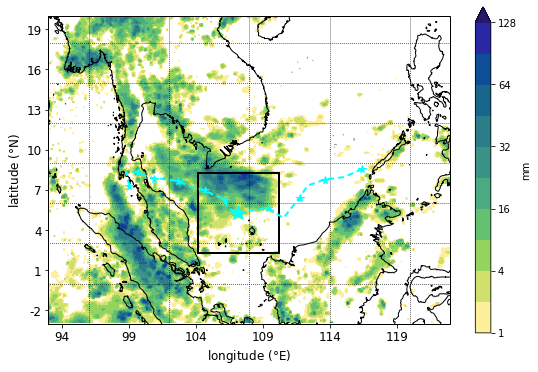

In [94]:
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# domain extent
ax.set_extent([lon_start, lon_end, lat_start, lat_end], ccrs.PlateCarree())
# gridlines
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.75, color='k', linestyle=':')
# customise further 
Levels=[1.0, 2.0, 4.0, 8.0, 16.0, 24.0, 32.0, 48.0, 64.0, 96.0, 128.0]

# plot data 
prcp_gpm_plot.plot.contourf(ax=ax, levels=Levels, extend='max', 
                        transform=ccrs.PlateCarree(),
                        cbar_kwargs={'label': 'mm'},
                        cmap=cmocean.cm.haline_r)

# customise plot
ax.coastlines(resolution='10m', color='k', linewidth=1)
ax.set_xticks([94, 99, 104, 109, 114, 119])
ax.set_yticks([-2, 1, 4, 7, 10, 13, 16, 19])
ax.set_xticklabels([94, 99, 104, 109, 114, 119], fontsize='large')
ax.set_yticklabels([-2, 1, 4, 7, 10, 13, 16, 19], fontsize='large')
ax.set_xlabel(r'longitude ($\degree$E)', fontsize='large')
ax.set_ylabel(r'latitude ($\degree$N)', fontsize='large')
ax.set_title('')

# overlay BV box position 
r0 = 3.0
ax.add_patch( Rectangle( (bv_lon[8]-r0, bv_lat[8]-r0),
                            2*r0, 2*r0, linewidth=2,
                            facecolor='none', edgecolor='k') )

# overlay Borneo vortex centre position
ax.plot(bv_lon[8], bv_lat[8], marker='*', markersize=16, color='cyan')

# overlay entire Borneo vortex track
ax.plot(bv_lon[:], bv_lat[:], '*', ms=8, markevery=2, linewidth=2, dashes=[3,2], color='cyan')

fig.savefig('fig4b_new.png')

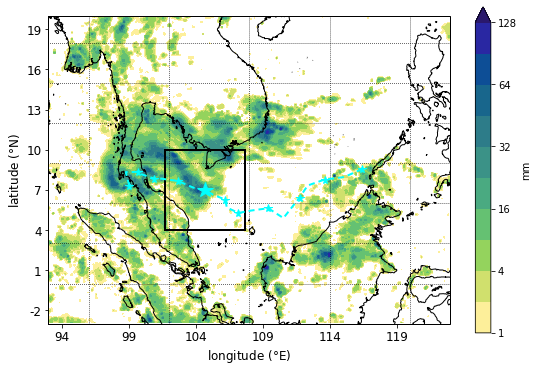

In [92]:
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# domain extent
ax.set_extent([lon_start, lon_end, lat_start, lat_end], ccrs.PlateCarree())
# gridlines
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.75, color='k', linestyle=':')
# customise further 
Levels=[1.0, 2.0, 4.0, 8.0, 16.0, 24.0, 32.0, 48.0, 64.0, 96.0, 128.0]

# plot data 
prcp_gpm_plot.plot.contourf(ax=ax, levels=Levels, extend='max', 
                        transform=ccrs.PlateCarree(),
                        cbar_kwargs={'label': 'mm'},
                        cmap=cmocean.cm.haline_r)

# customise plot
ax.coastlines(resolution='10m', color='k', linewidth=1)
ax.set_xticks([94, 99, 104, 109, 114, 119])
ax.set_yticks([-2, 1, 4, 7, 10, 13, 16, 19])
ax.set_xticklabels([94, 99, 104, 109, 114, 119], fontsize='large')
ax.set_yticklabels([-2, 1, 4, 7, 10, 13, 16, 19], fontsize='large')
ax.set_xlabel(r'longitude ($\degree$E)', fontsize='large')
ax.set_ylabel(r'latitude ($\degree$N)', fontsize='large')
ax.set_title('')

# overlay BV box position 
r0 = 3.0
ax.add_patch( Rectangle( (bv_lon[12]-r0, bv_lat[12]-r0),
                            2*r0, 2*r0, linewidth=2,
                            facecolor='none', edgecolor='k') )

# overlay Borneo vortex centre position
ax.plot(bv_lon[12], bv_lat[12], marker='*', markersize=16, color='cyan')

# overlay entire Borneo vortex track
ax.plot(bv_lon[:], bv_lat[:], '*', ms=8, markevery=2, linewidth=2, dashes=[3,2], color='cyan')

fig.savefig('fig5b_new.png')

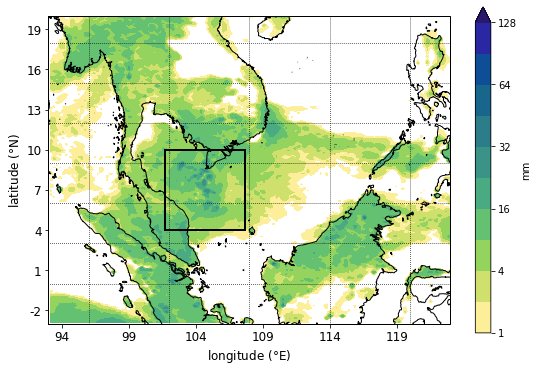

In [39]:
# N768 MetUM plot (Figs. 3c + 4c)

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# domain extent
ax.set_extent([lon_start, lon_end, lat_start, lat_end], ccrs.PlateCarree())
# gridlines
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.75, color='k', linestyle=':')
# customise further 
Levels=[1.0, 2.0, 4.0, 8.0, 16.0, 24.0, 32.0, 48.0, 64.0, 96.0, 128.0]

# plot data 
prcp_n768.plot.contourf(ax=ax, levels=Levels, extend='max', 
                        transform=ccrs.PlateCarree(),
                        cbar_kwargs={'label': 'mm'},
                        cmap=cmocean.cm.haline_r)

# customise plot
ax.coastlines(resolution='10m', color='k', linewidth=1)
ax.set_xticks([94, 99, 104, 109, 114, 119])
ax.set_yticks([-2, 1, 4, 7, 10, 13, 16, 19])
ax.set_xticklabels([94, 99, 104, 109, 114, 119], fontsize='large')
ax.set_yticklabels([-2, 1, 4, 7, 10, 13, 16, 19], fontsize='large')
ax.set_xlabel(r'longitude ($\degree$E)', fontsize='large')
ax.set_ylabel(r'latitude ($\degree$N)', fontsize='large')
ax.set_title('')

# overlay BV box position 
r0 = 3.0
ax.add_patch( Rectangle( (bv_lon[12]-r0, bv_lat[12]-r0),
                            2*r0, 2*r0, linewidth=2,
                            facecolor='none', edgecolor='k') )

In [40]:
fig.savefig('fig4c_new.png')

In [50]:
# process Himawari data 
himawari_data = xr.open_dataset(himawari_path).metpy.parse_cf()

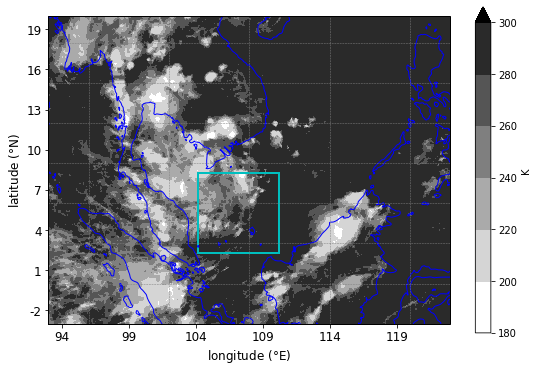

In [52]:
# produce Himawari plot (Figs. 3d + 4d)

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# domain extent
ax.set_extent([lon_start, lon_end, lat_start, lat_end], ccrs.PlateCarree())
# gridlines
plt.gca().gridlines(color='grey', linestyle='--', linewidth=0.5)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='blue', linewidth=1.0)

# plot data 
Levels=[180, 200, 220, 240, 260, 280, 300]
t_bright = himawari_data.T_b
t_bright.plot.contourf(ax=ax, levels=Levels, extend='max', transform=ccrs.PlateCarree(),
                        cbar_kwargs={'label': 'K'},
                        cmap='gist_yarg')

# customise plot      
ax.set_xticks([94, 99, 104, 109, 114, 119])
ax.set_yticks([-2, 1, 4, 7, 10, 13, 16, 19])
ax.set_xticklabels([94, 99, 104, 109, 114, 119], fontsize='large')
ax.set_yticklabels([-2, 1, 4, 7, 10, 13, 16, 19], fontsize='large')
ax.set_xlabel(r'longitude ($\degree$E)', fontsize='large')
ax.set_ylabel(r'latitude ($\degree$N)', fontsize='large')
ax.set_title('')

# overlay BV box position 
r0 = 3.0
ax.add_patch( Rectangle( (bv_lon[8]-r0, bv_lat[8]-r0),
                            2*r0, 2*r0, linewidth=2,
                            facecolor='none', edgecolor='c') )

In [53]:
fig.savefig('fig3d_new.png')